# Task 1 - Face Detection Using HOG, SVM, and Non-Max Suppression

## Image Gradient

Image gradients are foundational in detecting edges and textures within an image. They are calculated as vectors, with each component of the vector representing the change in image intensity along the x and y directions. The **direction** of the gradient points towards where the intensity increase is the greatest, effectively highlighting edges. The **magnitude** of this gradient quantifies the steepness or rate of change in intensity, which is crucial for identifying prominent features within the image.

## Feature Vector Extraction Using Histogram of Oriented Gradient (HOG)

Generating these feature vectors includes few steps. The example shown below ar e for human detection but can easily be used to train a SVM to run over faces instead.

### Prepreces the image - solving a smaller problem

1. First we crop the image.
2. Then we can decide to rescale or not the sub image we created.
3. We define a block size. And a cell size. Usually they are rectangles.
4. The block size should be a multiple of the cell size so we could slide it over the grid of cells that we created.

![Cells](https://storage.googleapis.com/applied-cs-runi/hog_cells_split.png)

In the image the cell size is 8x8 an block size of 16x16 (4 cells per block)

### Gradient Computation

This step emphasizes the image's contours and textures by identifying spatial variations in intensity. The computation of gradients is essential for detecting edges and other significant transitions in pixel values, serving as the basis for building a feature representation.
Here is an example of how to calculate the graident magnitude nad orientation for a single point.

![Simple gradient calculation](https://storage.googleapis.com/applied-cs-runi/gradient_mag.png)

### Cell Histograms

The division of the image into cells and the subsequent creation of gradient orientation histograms for each cell serve to capture the local spatial structure of an image. The parameter $Q$ signifies the number of orientation bins used to categorize the gradient directions, effectively quantifying the distribution of edge directions within a cell.

![Cell Histogram](https://storage.googleapis.com/applied-cs-runi/cell_histogram.png)

For example here we collect 4 point to the histogram. Here $Q=9$
* The first have mag=60 and angle=20deg meaning it contributes 60 to the 20deg bin.
* The second have mag=60 and angle=40deg meaning it contributes 60 to the 40deg bin.
* The third have mag=60 and angle=30deg meaning it contributes 30 to the 20deg bin and 30 to the 40deg bin.
* The fourth have mag=60 and angle=25deg meaning it contributes 15 to the 20deg bin and 45 to the 40deg bin. Since 25 is of distance of 5 from 20 and 15 from 40 meaning its magnitude should be splitted with respect to the difference in the angle.

### Normalization

Normalizing these histograms over blocks enhances the descriptor's robustness to changes in lighting and contrast. Each block, comprising $C$ cells, is processed to ensure that the feature vector remains consistent across different lighting conditions, thus enhancing the detection system's reliability.

### Feature Vector Assembly

Concatenating the normalized histograms from all blocks forms the comprehensive HOG feature vector for the image. The dimensionality of this vector is $Q \times C \times B$, encapsulating detailed information about the image's gradient structure across different spatial regions and scales.

![HOG blocks](https://storage.googleapis.com/applied-cs-runi/hog_blocks.png)

In this example $Q=9,C=4,B=15×7$

## SVM Training on Labeled HOG Features

The SVM is trained on these HOG feature vectors, each labeled as either a face or a non-face. By finding a hyperplane that maximizes the separation margin between the two classes, the SVM assigns weights to each element of the feature vector, alongside a bias term. This configuration makes the SVM a linear classifier in the feature space defined by the HOG descriptors, tailored to distinguish faces from non-faces effectively.

![SVM Cof](https://storage.googleapis.com/applied-cs-runi/svm_coeffiecient.png)

Here we can see a demostration of SVM over a 1D vector space, 2D vector space and 3D vector space. The HOG vector space dimension $Q \times C \times B$

## Classifying New Images

Classification involves computing the dot product between a new image's HOG feature vector ($x$) and the weight vector ($w$) learned by the SVM, adding a bias term ($b$) to this product. The function $f(x) = \text{sign}(w \cdot x + b)$ yields a binary outcome, indicating the presence or absence of a face within the image. This process leverages the linear model established during training to evaluate new images.

![Classify](https://storage.googleapis.com/applied-cs-runi/svm_apply.png)

## Sliding Window and Image Scaling (Image Pyramid)

To accommodate faces of various sizes within large images, the sliding window technique is employed at multiple scales, creating an image pyramid. This multi-scale approach ensures that the detection algorithm can identify faces regardless of their scale relative to the fixed-size window, enhancing the detection system's versatility and effectiveness.

![pyramid](https://storage.googleapis.com/applied-cs-runi/image_pyramid.png)

In this image we see how scaling the image/window can help to detect humans of seen in different sizes. The men in the red rectangle is found on the first scale, and the woman is found on the last scale.

## Non-Max Suppression for Selecting the Right Sliding Window

Finally, non-max suppression is applied to resolve the issue of multiple detections for the same face, which is common with the sliding window approach. By calculating the Intersection over Union (IoU) for each pair of detection windows and retaining only the window with the highest classification score in cases of significant overlap, this technique ensures that each detected face is represented by a single, accurately positioned window.

![non max](https://storage.googleapis.com/applied-cs-runi/non_max_suppression.png)

## Face landmark detection

After successfully detecting a face within an image using the Histogram of Oriented Gradients (HOG) and Support Vector Machines (SVM) for face detection, we can further refine our understanding of the detected face by identifying specific facial landmarks within the bounded rectangle of the detected face. This refinement involves applying similar machine learning or deep learning techniques tailored to recognize facial structures, such as eyes, nose, mouth, and jawline, within the confines of the detected face area. By focusing on this defined region, the landmark detection algorithm efficiently analyzes facial features, utilizing the structural information provided by HOG features or leveraging deep learning models trained on facial landmarks. This approach not only enhances the efficiency of the landmark detection process by limiting the area of interest but also improves accuracy by concentrating on the most relevant portion of the image where a face has been confirmed to exist.

## Following in a video

In a video, applying HOG and SVM for face detection followed by landmark detection involves processing each frame as an individual image. Here's a very short overview of how this can be done:

1. **Frame Extraction**: The video is decomposed into individual frames.

2. **Face Detection**: For each frame, the HOG and SVM-based face detection method is applied to locate faces. This step identifies regions within the frame where faces are present.

3. **Landmark Detection**: Within the detected face regions, facial landmark detection techniques are then applied to each face to identify key facial features.

4. **Result Compilation**: The detected faces and their landmarks are annotated on the frames, which can then be recompiled back into a video stream for visualization or further analysis.

By processing each frame sequentially and applying face and landmark detection techniques, one can analyze and interpret facial expressions, head movements, and other dynamic features in video content.

## Credits:

* [Youtube playlist for object detection](https://youtube.com/playlist?list=PL1GQaVhO4f_jLxOokW7CS5kY_J1t1T17S&si=7PkfXecnHQzhOmff). Images taken from few of the videos here.

# Code implemantation

Let's begin with some set of the enviroment

In [22]:
!mkdir -p detectors
!wget -O detectors/face_landmarks.dat https://storage.googleapis.com/applied-cs-runi/shape_predictor_68_face_landmarks.dat

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file detectors already exists.
Error occurred while processing: detectors.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
!mkdir -p filters
!wget -O filters/glasses.png https://storage.googleapis.com/applied-cs-runi/glasses222.png
!wget -O filters/mustache.png https://storage.googleapis.com/applied-cs-runi/mustache2.png
!wget -O filters/unicorn.png https://storage.googleapis.com/applied-cs-runi/unicorn.png
!wget -O filters/pirate.png https://storage.googleapis.com/applied-cs-runi/pirate.png

!mkdir -p data
!wget -O data/face_video.mp4 https://storage.googleapis.com/applied-cs-runi/face_video1.mp4
!wget -O data/face_image.jpeg https://storage.googleapis.com/applied-cs-runi/face_image1.jpeg

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file filters already exists.
Error occurred while processing: filters.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file data already exists.
Error occurred while processing: data.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
!pip uninstall -y opencv-contrib-python opencv-python opencv-contrib-python-headless && pip install opencv-contrib-python

Found existing installation: opencv-contrib-python 4.9.0.80
Uninstalling opencv-contrib-python-4.9.0.80:
  Successfully uninstalled opencv-contrib-python-4.9.0.80
  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)


You can safely remove it manually.


In [25]:
import cv2
import dlib
import time
import sys
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import math
# from google.colab.patches import cv2_imshow
import moviepy.editor

In [26]:
""" UTIL FUNCTIONS"""
def compress_video(input_file, target_bitrate="500k", codec="libx264"):
    """
    Compresses and plays a video file using MoviePy.

    Parameters:
    - input_file (str): Path to the input video file.
    - target_bitrate (str): Target bitrate for compression (e.g., "500k").
    - codec (str): Codec to use for compression (e.g., "libx264").

    Returns:
    - path to output compressed file = 'c_' + input_file
    """

    # Load the input video
    video = moviepy.editor.VideoFileClip(input_file)

    # Resize the video to reduce file size
    resized_video = video.resize((video.w // 2, video.h // 2))

    # Preserve audio
    resized_video = resized_video.set_audio(video.audio)

    # Compress the video with the specified bitrate and codec
    output_file = 'c_' + input_file
    resized_video.write_videofile(output_file, codec=codec, bitrate=target_bitrate, verbose=False)

    return output_file

In [27]:
DEFAULT_SCALE_FACTOR = 2
DEFAULT_VIDEO_HEIGHT = 320
DEFAULT_VIDEO_WIDTH = 270

def read_frames(cap: cv2.VideoCapture):
  while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    yield frame

class FrameEditor:
  def __init__(self, face_detector, face_landmark_detector, filter_function, scale_factor=DEFAULT_SCALE_FACTOR, draw_landmarks=True):
    self._face_detector = face_detector
    self._face_landmark_detector = face_landmark_detector
    self._scale_factor = scale_factor
    self._filter_function = filter_function
    self.draw_landmarks = draw_landmarks


  def edit_frame(self, frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Make the image gray so it will be less computationally intense.
    frame_height, frame_width = frame.shape[:2]

    # Downscale for face detection rectangle by self._scale_factor
    down_scaled_gray_frame = cv2.resize(gray_frame, (int(frame_width/self._scale_factor), int(frame_height/self._scale_factor)))

    for face_landmarks in self._read_face_landmarks(down_scaled_gray_frame):
      rescaled_face_landmarks = self._upscale_points(face_landmarks)

      # Apply the filter (Glasses, Mustache...) on the current frame based on the found landmarks.
      self._filter_function(frame, rescaled_face_landmarks)
      # Draw the dynamic face landmarks on the frame (for demo purposes)
      if self.draw_landmarks:
        draw_face_landmarks(frame, rescaled_face_landmarks)

  def _read_face_landmarks(self, image):
    # For each face find its landmarks and yield them back for further processing.
    for face in self._face_detector(image):
      landmarks = self._face_landmark_detector(image, face)

      yield np.array([[p.x, p.y] for p in landmarks.parts()])

  def _upscale_points(self, face_landmarks):
    return np.vectorize(lambda s: s * self._scale_factor)(face_landmarks)

In [51]:
glasses_image = cv2.imread("filters/glasses.png", -1)
mustache_image = cv2.imread("filters/mustache2.png", -1)
unicorn_image = cv2.imread("filters/unicorn.png", -1)
pirate_image = cv2.imread("filters/pirate2.png", -1)

def filter_glasses(image, face_landmarks):
    x_eye_left = int((face_landmarks[27][0] + face_landmarks[28][0])/2)
    y_eye_left = int((face_landmarks[27][1] + face_landmarks[28][1])/2)

    return filter_generic(image, face_landmarks, glasses_image.copy(), x_eye_left, y_eye_left, 1)


def filter_mustache(image, face_landmarks):
    x_mustache = int((face_landmarks[50][0] + face_landmarks[52][0])/2)
    y_mustache = int((face_landmarks[51][1] + face_landmarks[33][1])/2)

    return filter_generic(image, face_landmarks, mustache_image.copy(), x_mustache, y_mustache, 0.8)

def filter_unicorn(image, face_landmarks):
    x_forehead_center = int((face_landmarks[28][0] + face_landmarks[28][0])/2)
    y_avg_brows = (face_landmarks[20][1] + face_landmarks[25][1])/2
    y_forehead_center = int((y_avg_brows + 2.5 * (y_avg_brows - face_landmarks[28][1])))

    return filter_generic(image, face_landmarks, unicorn_image.copy(), x_forehead_center, y_forehead_center, 1.05)

def filter_pirate(image, face_landmarks):
    x_pirate = int((face_landmarks[34][0] + face_landmarks[40][0])/2)
    y_avg_brows = (face_landmarks[20][1] + face_landmarks[25][1])/2
    y_pirate = int((y_avg_brows + 1.5 * (y_avg_brows - face_landmarks[28][1])))

    return filter_generic(image, face_landmarks, pirate_image.copy(), x_pirate, y_pirate, 2)

# A function to position the filter based on the face landmarks and filter specific x,y coordinates.
def filter_generic(image, face_landmarks, filter, x, y, filter_size_scale):
    face_width, _ = get_face_size(face_landmarks)
    roll = get_face_roll(face_landmarks)

    filter_width = int(filter_size_scale * face_width)
    filter_height = int(filter_size_scale * filter.shape[0] * filter_width // filter.shape[1])

    filter = cv2.resize(filter, (filter_width, filter_height))

    padding = int(np.ceil(np.sqrt(2) * max(filter_width, filter_height) / 2 - max(filter_width, filter_height) / 2))
    filter = cv2.copyMakeBorder(filter, padding, padding, padding, padding, cv2.BORDER_CONSTANT)
    x_filter = x - int(filter.shape[1]/2)
    y_filter = y - int(filter.shape[0]/2)
    center = (filter.shape[1] // 2, filter.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, -roll, 1.0)
    filter = cv2.warpAffine(filter, rotation_matrix, (filter.shape[1], filter.shape[0]))


    y1, y2 = y_filter, y_filter + filter.shape[0]
    x1, x2 = x_filter, x_filter + filter.shape[1]

    f_y1, f_y2 = 0, filter.shape[0]
    f_x1, f_x2 = 0, filter.shape[1]

    if y1 < 0:
      f_y1 = -y1
      y1 = 0

    if x1 < 0:
      f_x1 = -x1
      x1 = 0

    if y2 >= image.shape[0]:
      f_y2 = filter.shape[0] - (y2 - image.shape[0]) - 1
      y2 = image.shape[0] - 1

    if x2 >= image.shape[1]:
      f_x2 = filter.shape[1] - (x2 - image.shape[1]) - 1
      x2 = image.shape[1] - 1

    alpha_s = filter[f_y1:f_y2, f_x1:f_x2, 3] / 255.0
    alpha_l = 1.0 - alpha_s

    for c in range(0, 3):
        filter_data = alpha_s * filter[f_y1:f_y2, f_x1:f_x2, c]
        image_data = alpha_l * image[y1:y2, x1:x2, c]

        image[y1:y2, x1:x2, c] = (filter_data + image_data)

    return image

def draw_face_landmarks(image, face_landmarks):
    for (x, y) in face_landmarks:
      cv2.circle(image, (x, y), 1, (0, 255, 0), 2)

def get_face_size(face_landmarks):
    face_width = np.linalg.norm(face_landmarks[16] - face_landmarks[0])
    face_height = np.linalg.norm(face_landmarks[8] - (face_landmarks[19] + face_landmarks[24])/2)

    return face_width, face_height

def get_face_roll(face_landmarks):
    # check what is the tilt of the face. tilt is the angle between the line joining the eyes and the horizontal line
    x_eye_left = (face_landmarks[37][0] + face_landmarks[38][0] + face_landmarks[40][0] + face_landmarks[41][0])/4
    y_eye_left = (face_landmarks[37][1] + face_landmarks[38][1] + face_landmarks[40][1] + face_landmarks[41][1])/4

    x_eye_right = (face_landmarks[43][0] + face_landmarks[44][0] + face_landmarks[46][0] + face_landmarks[47][0])/4
    y_eye_right = (face_landmarks[43][1] + face_landmarks[44][1] + face_landmarks[46][1] + face_landmarks[47][1])/4

    angle = np.arctan((y_eye_right - y_eye_left)/(x_eye_right - x_eye_left))

    return math.degrees(angle)

In [52]:
def with_fps_report(iterable_frames):
    start_time = time.time()
    max_latency = 0
    latencies = []  # List to store each frame's processing latency
    count = 0

    last_frame_time = time.time()
    for frame in iterable_frames:
        yield frame

        current_latency = time.time() - last_frame_time
        latencies.append(current_latency)  # Store current frame's latency

        count += 1
        max_latency = max(max_latency, current_latency)
        last_frame_time = time.time()

    total_time = time.time() - start_time
    fps = count / total_time

    # Convert latencies to a numpy array for percentile calculations
    latencies = np.array(latencies)
    p90_latency = np.percentile(latencies, 90)
    p50_latency = np.percentile(latencies, 50)
    p25_latency = np.percentile(latencies, 25)

    print(f"FPS: {fps}")
    print(f"Max Latency: {max_latency * 1000} ms")
    print(f"P90 Latency: {p90_latency * 1000} ms")
    print(f"P50 Latency: {p50_latency * 1000} ms")
    print(f"P25 Latency: {p25_latency * 1000} ms")


In [53]:
class OptimizedForVideoDetector:
  def __init__(self, face_detector, once_in):
    self._face_detector = face_detector
    self._frame_count = 0
    self._trackers = []
    self._once_in = once_in

  def find_faces(self, frame):
    try:
      if self._frame_count % self._once_in == 0:
        # When it is time to find the faces again, find them
        faces = self._face_detector(frame)

        # Prepare the Median Flow Tracker for the next frames.
        self._initialize_trackers(faces, frame)

        return faces

      return self._collect_faces_from_trackers(frame)
    finally:
      self._frame_count += 1


  def _initialize_trackers(self, faces, frame):
    self._trackers = []

    # For each face create a separate tracker (in snapchat its no more than 2).
    for face in faces:
      (x, y, w, h) = (face.left(), face.top(), face.width(), face.height())

      tracker = cv2.legacy.TrackerMedianFlow_create()
      tracker.init(frame, (x, y, w, h))
      self._trackers.append(tracker)

  def _collect_faces_from_trackers(self, frame):
    faces = []

    for tracker in self._trackers:
      # For each tracker try and find the face rectangle, only if not lost return the rectangle
      success, box = _try_update(tracker, frame)

      if success:
          (x, y, w, h) = [int(v) for v in box]

          faces.append(dlib.rectangle(x, y, x + w, y + h))

    return faces

def _try_update(tracker: cv2.legacy.TrackerMedianFlow, frame):
  try:
    return tracker.update(frame)
  except Exception as e:
    print(e)

    return False, None


# Task 2 - Study cases

Let's see the editing in action for simple image

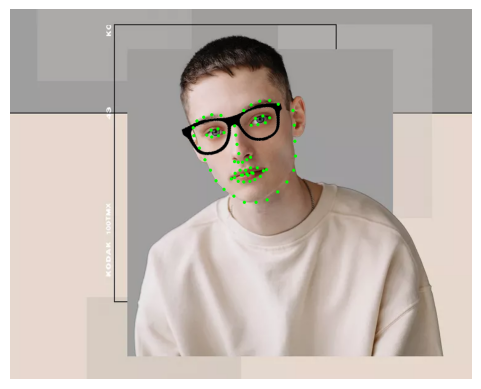

In [54]:
glasses_editor = FrameEditor(
    dlib.get_frontal_face_detector(),
    dlib.shape_predictor("detectors/face_landmarks.dat"),
    filter_glasses,
    1
)

face_image = cv2.imread("data/face1.jpg")

glasses_editor.edit_frame(face_image)

plt.axis("off")
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))

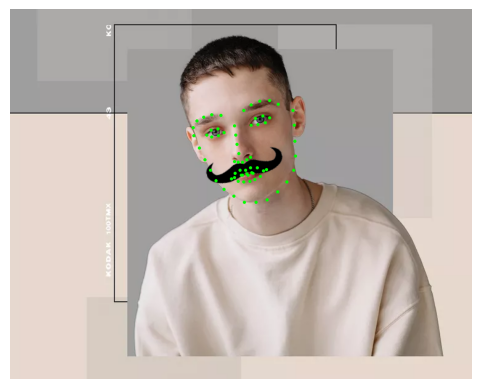

In [55]:
mustache_editor = FrameEditor(
    dlib.get_frontal_face_detector(),
    dlib.shape_predictor("detectors/face_landmarks.dat"),
    filter_mustache,
    1
)

face_image = cv2.imread("data/face1.jpg")

mustache_editor.edit_frame(face_image)

plt.axis("off")
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
# cv2_imshow(cv2.resize(face_image, (face_image.shape[0] // 4, face_image.shape[1] // 3)))

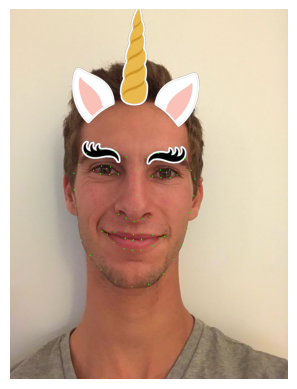

In [56]:
unicorn_editor = FrameEditor(
    dlib.get_frontal_face_detector(),
    dlib.shape_predictor("detectors/face_landmarks.dat"),
    filter_unicorn,
    1
)

face_image = cv2.imread("data/face_image1.jpeg")

unicorn_editor.edit_frame(face_image)

plt.axis("off")
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
# cv2_imshow(cv2.resize(face_image, (face_image.shape[0] // 4, face_image.shape[1] // 3)))

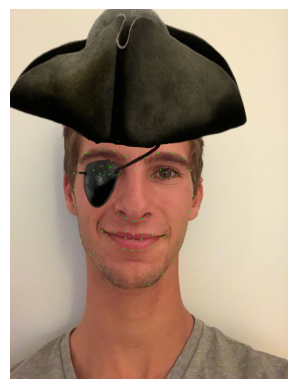

In [57]:
pirate_editor = FrameEditor(
    dlib.get_frontal_face_detector(),
    dlib.shape_predictor("detectors/face_landmarks.dat"),
    filter_pirate,
    1
)

face_image = cv2.imread("data/face_image1.jpeg")

pirate_editor.edit_frame(face_image)

plt.axis("off")
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
# cv2_imshow(cv2.resize(face_image, (face_image.shape[0] // 4, face_image.shape[1] // 3)))

Now lets test the performace of a face detector over a video.

We will start with the following setup

* Downscale of image for face detection step: 1x (No downscale) - The output video resolution stay the same.
* Find all the faces for every


In [60]:
cap = cv2.VideoCapture("data/face_video.mp4")
editor = FrameEditor(
    dlib.get_frontal_face_detector(),
    dlib.shape_predictor("detectors/face_landmarks.dat"),
    filter_mustache,
    1
)

output_filename = 'output_of_no_optimization.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_filename, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

print("No optimization results:")

for frame in with_fps_report(read_frames(cap)):
  editor.edit_frame(frame)

  out.write(frame)


cap.release()
out.release()

# low-res preview
moviepy.editor.ipython_display(compress_video(output_filename), width=DEFAULT_VIDEO_WIDTH, height=DEFAULT_VIDEO_HEIGHT)

No optimization results:
FPS: 2.7176844880047293
Max Latency: 680.635929107666 ms
P90 Latency: 419.6160316467287 ms
P50 Latency: 350.4157066345215 ms
P25 Latency: 332.744836807251 ms
Moviepy - Building video c_output_of_no_optimization.mp4.
Moviepy - Writing video c_output_of_no_optimization.mp4



Moviepy - Done !
Moviepy - video ready c_output_of_no_optimization.mp4


Now lets test the performace of a face detector over a video.

Now let see the performance the following setup

* Downscale of image for face detection step: 2x (Scale down only for face rectangle detection) - The output video resolution stay the same.
* Find all the faces for every


In [62]:
cap = cv2.VideoCapture("data/face_video.mp4")
editor = FrameEditor(
    dlib.get_frontal_face_detector(),
    dlib.shape_predictor("detectors/face_landmarks.dat"),
    filter_mustache,
    2
)

output_filename = 'output_of_2x_scaledown_optimization.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_filename, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

print("Down scale 2x optimization results:")

for frame in with_fps_report(read_frames(cap)):
  editor.edit_frame(frame)

  out.write(frame)


cap.release()
out.release()

# low-res preview
moviepy.editor.ipython_display(compress_video(output_filename), width=DEFAULT_VIDEO_WIDTH, height=DEFAULT_VIDEO_HEIGHT)

Down scale 2x optimization results:
FPS: 6.9513341628438905
Max Latency: 293.6360836029053 ms
P90 Latency: 179.48966026306155 ms
P50 Latency: 134.8550319671631 ms
P25 Latency: 122.23100662231445 ms
Moviepy - Building video c_output_of_2x_scaledown_optimization.mp4.
Moviepy - Writing video c_output_of_2x_scaledown_optimization.mp4



Moviepy - Done !
Moviepy - video ready c_output_of_2x_scaledown_optimization.mp4


# Task 3 - Improving our implementation, to achive realtime performace.



## Median Flow Tracker Overview

### 1. **Initialization:**
   - Select the object by specifying a bounding box.
   - Detect feature points within the bounding box.

### 2. **Feature Point Tracking:**
   - Calculate the optical flow for these points to the next frame, involving:
     - **Brightness Constancy Constraint:** Assumes a point's brightness is constant over short time intervals.
     - **Gradient Constraint:** Relies on the spatial and temporal gradients of image brightness to estimate movement.
     - **Solving Optical Flow:** Utilizes methods like the Lucas-Kanade method or the Horn-Schunck algorithm, which add constraints or assumptions to accurately estimate the movement (flow vectors) of points between frames.
   - Filter out outliers to improve tracking accuracy.

### 3. **Median Flow Calculation:**
   - Calculate the displacement vectors for the tracked points.
   - Determine the median displacement vector, providing a robust estimate of object motion.

### 4. **Object Motion Estimation:**
   - Update the object's bounding box based on the median flow.
   - Adjust the bounding box size if necessary, to account for scale changes.

### 5. **Tracking and Updating:**
   - Repeat the process for each new frame.
   - Perform consistency checks and re-initialize tracking if necessary.

## Key Aspects

- **Efficiency and Robustness:** The Median Flow Tracker's use of median displacement makes it resistant to outliers, efficient for real-time applications, but sensitive to the quality of feature point tracking.
- **Optical Flow:** A critical component in tracking feature points, its calculation is crucial for the accuracy of the tracking process. It involves assessing the change in appearance of points due to motion, under the assumption of brightness constancy and spatial-temporal gradient consistency, solved through algorithms that handle the inherent ambiguities in motion estimation.


## How we used it
We used this tracking method to skip the calculation of the face rectangle for every fame.

We calculate the face rectangle based on HOG as before, but now we use this rectangle to initiate a tracking bounding box. The tracker then used in the next `once_in` frames, to provide us the face rectangle of the new frame.

The calculation of Median Flow is more performant than the calculation of HOG, so we gain improvment in performance. But to keep high quality and accuracy we only use the tracker for `once_in` frames, then re-initialize it to focus again on the face if it was lost or ansync.

A normal FPS (Frame per second) for a video is 30, so we start with a `once_in=10` meaning it will only run HOG, 3 times for every second of video, and Median Flow Tracker for the rest of 27 frames of the second.

Now let see the performance the following setup

* Downscale of image for face detection step: 2x (Scale down only for face rectangle detection) - The output video resolution stay the same.
* Find all the faces only once in 10 frames, for the rest of the frames use Median Flow Tracker

In [63]:
cap = cv2.VideoCapture("data/face_video.mp4")
editor = FrameEditor(
    OptimizedForVideoDetector(dlib.get_frontal_face_detector(), once_in=10).find_faces,
    dlib.shape_predictor("detectors/face_landmarks.dat"),
    filter_mustache,
    2
)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_filename = 'output_of_2x_scaledown_and_MFT_optimization.mp4'
out = cv2.VideoWriter(output_filename, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

print("Down scale 2x optimization results and Median Flow Tracker:")

for frame in with_fps_report(read_frames(cap)):
  editor.edit_frame(frame)

  out.write(frame)


cap.release()
out.release()

# low-res preview
moviepy.editor.ipython_display(compress_video(output_filename), width=DEFAULT_VIDEO_WIDTH, height=DEFAULT_VIDEO_HEIGHT)

Down scale 2x optimization results and Median Flow Tracker:
FPS: 15.225041963352021
Max Latency: 215.5773639678955 ms
P90 Latency: 120.49908638000535 ms
P50 Latency: 55.04441261291504 ms
P25 Latency: 48.493266105651855 ms
Moviepy - Building video c_output_of_2x_scaledown_and_MFT_optimization.mp4.
Moviepy - Writing video c_output_of_2x_scaledown_and_MFT_optimization.mp4



Moviepy - Done !
Moviepy - video ready c_output_of_2x_scaledown_and_MFT_optimization.mp4


Now let see the performance the following setup

* Downscale of image for face detection step: 4x (Scale down only for face rectangle detection) - The output video resolution stay the same.
* Find all the faces only once in 30 frames, for the rest of the frames use Median Flow Tracker

In [64]:
cap = cv2.VideoCapture("data/face_video.mp4")
editor = FrameEditor(
    OptimizedForVideoDetector(dlib.get_frontal_face_detector(), once_in=30).find_faces,
    dlib.shape_predictor("detectors/face_landmarks.dat"),
    filter_mustache,
    4
)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_filename = 'output_of_4x_scaledown_and_MFT_optimization.mp4'
out = cv2.VideoWriter(output_filename, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

print("Down scale 4x optimization and Median Flow Tracker results:")

for frame in with_fps_report(read_frames(cap)):
  editor.edit_frame(frame)

  out.write(frame)


cap.release()
out.release()

# low-res preview
moviepy.editor.ipython_display(compress_video(output_filename), width=DEFAULT_VIDEO_WIDTH, height=DEFAULT_VIDEO_HEIGHT)

Down scale 4x optimization and Median Flow Tracker results:
FPS: 21.08818247063511
Max Latency: 128.3891201019287 ms
P90 Latency: 63.46664428710938 ms
P50 Latency: 48.91824722290039 ms
P25 Latency: 38.91730308532715 ms
Moviepy - Building video c_output_of_4x_scaledown_and_MFT_optimization.mp4.
Moviepy - Writing video c_output_of_4x_scaledown_and_MFT_optimization.mp4



Moviepy - Done !
Moviepy - video ready c_output_of_4x_scaledown_and_MFT_optimization.mp4


### Conclusion

Lets sum up the results and conclude the improvement (No GPU attached to the Colab machine)

1. No optimization:
  ```
FPS: 3.4532804441959115
Max Latency: 726.3534069061279 ms
P90 Latency: 395.4737663269043 ms
P50 Latency: 264.4948959350586 ms
P25 Latency: 260.58006286621094 ms
  ```
2. Down scale 2x for face rectangle detection optimization
```
FPS: 9.084595786228807
Max Latency: 177.5643825531006 ms
P90 Latency: 149.36299324035645 ms
P50 Latency: 102.58960723876953 ms
P25 Latency: 100.18670558929443 ms
```
3. Down scale 2x optimization results and once_in=10 Median Flow Tracker
```
FPS: 19.283881687359205
Max Latency: 150.85959434509277 ms
P90 Latency: 81.93111419677784 ms
P50 Latency: 45.52769660949707 ms
P25 Latency: 42.79148578643799 ms
```
4. Down scale 4x optimization and once_in=30 Median Flow Tracker
```
FPS: 21.483823862681742
Max Latency: 95.68548202514648 ms
P90 Latency: 64.80031013488775 ms
P50 Latency: 43.12324523925781 ms
P25 Latency: 40.83693027496338 ms
```

To conclude we achived a 150% improvment in FPS from (1) to (2) by downscaling the image 2 times for face detection. Although the latencies are still high.

We achived ~120% improvement in FPS from (2) to (3) by adding the Median Flow Tracker mechanism, with `once_in=10` which indicate we still keep high accuracy compared to the previus once since we find the face 3 times in a second on average.

We achived ~12% improvement in FPS from (3) to (4) by adding the Median Flow Tracker mechanism, with `once_in=30` and 4x downscale for face detection.

At this point we have passed the 20 FPS, which is sufficiant for realtime video, and definitlly for a preview of a video while filming it.

Also we can see a consistent improvement from (1), (2), (3) till (4) in latency distribution which indicates the realtime experiment will be more smooth.


All the tests run on a CPU which is not ideal for video editing, adjusting this implementation to be computed on mobile phone GPU can increase the performance by a magnitude, since most of the calculations can be calculated in parallel (For example the gradient of each point in HOG).



## Realtime preview

In [65]:
from IPython.display import HTML
data_url = "https://storage.googleapis.com/applied-cs-runi/real_time_preview.mp4"
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

The video was recorded in realtime, with the code bellow

```python
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
editor = FrameEditor(
    OptimizedForVideoDetector(dlib.get_frontal_face_detector(), once_in=30).find_faces,
    dlib.shape_predictor("detectors/face_landmarks.dat"),
    filter_glasses,
    2
)
frame_count = 0
start_time = time.time()

for frame in read_frames(cap):
    new_frame = frame.copy()
    editor.edit_frame(new_frame)

    cv2.putText(new_frame, "FPS: " + str(frame_count / (time.time() - start_time))[:4], (10, 90),
                cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 255, 255), 1)
    cv2.putText(new_frame, "Frame: " + str(frame_count), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 255, 255), 1)

    cv2.imshow("Face full size", new_frame)

    frame_count += 1

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()
```

In [69]:
# Make sure to select the right camera index (0 for default camera, 1 for external camera)
cap = cv2.VideoCapture(1, cv2.CAP_DSHOW)
editor = FrameEditor(
    OptimizedForVideoDetector(dlib.get_frontal_face_detector(), once_in=30).find_faces,
    dlib.shape_predictor("detectors/face_landmarks.dat"),
    filter_glasses,
    1
)
frame_count = 0
start_time = time.time()

for frame in read_frames(cap):
    new_frame = frame.copy()
    editor.edit_frame(new_frame)

    cv2.putText(new_frame, "FPS: " + str(frame_count / (time.time() - start_time))[:4], (10, 90),
                cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 255, 255), 1)
    cv2.putText(new_frame, "Frame: " + str(frame_count), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 255, 255), 1)

    cv2.imshow("Face full size", new_frame)

    frame_count += 1

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()